# Building a Neural Network for MNIST

In [85]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [86]:
# Transform PIL image into a tensor. The values are in the range [0, 1]
t = transforms.ToTensor()

# Load datasets for training and testing.
mnist_training = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=t)
mnist_val = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=t)

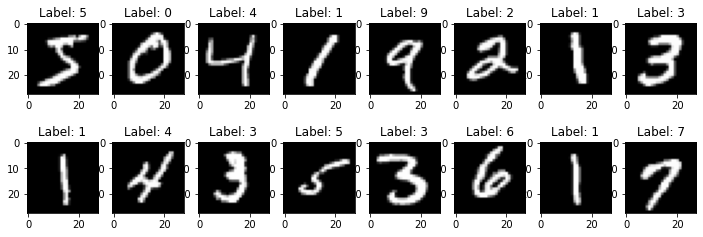

In [87]:
# Plot some digits.

cols = 8
rows = 2

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(1.5*cols, 2*rows))
for i, ax in enumerate(axes.flatten()):
    image, label = mnist_training[i]          # returns PIL image with its labels
    ax.set_title(f"Label: {label}")
    ax.imshow(image.squeeze(0), cmap='gray')  # we get a 1x28x28 tensor -> remove first dimension
plt.show()

In [88]:
# Create a simple neural network with one hidden layer with 256 neurons.
model = torch.nn.Sequential(
    torch.nn.Linear(28*28, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

# Use Adam as optimizer.
opt = torch.optim.Adam(params=model.parameters(), lr=0.01)

# Use CrossEntropyLoss for as loss function.
loss_fn = torch.nn.CrossEntropyLoss()

# We train the model with batches of 500 examples.
batch_size = 500
train_loader = torch.utils.data.DataLoader(mnist_training, batch_size=batch_size, shuffle=True)

In [89]:
# Training of the model. We use 10 epochs.
losses = []

for epoch in range(10):
    for imgs, labels in train_loader:
        n = len(imgs)
        # Reshape data from [500, 1, 28, 28] to [500, 784] and use the model to make predictions.
        predictions = model(imgs.view(n, -1))  
        # Compute the loss.
        loss = loss_fn(predictions, labels) 
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
    print(f"Epoch: {epoch}, Loss: {float(loss)}")


Epoch: 0, Loss: 0.1814579963684082
Epoch: 1, Loss: 0.07897494733333588
Epoch: 2, Loss: 0.061483509838581085
Epoch: 3, Loss: 0.054685574024915695
Epoch: 4, Loss: 0.047717854380607605
Epoch: 5, Loss: 0.03222307562828064
Epoch: 6, Loss: 0.025303684175014496
Epoch: 7, Loss: 0.04362534359097481
Epoch: 8, Loss: 0.019005214795470238
Epoch: 9, Loss: 0.013590291142463684


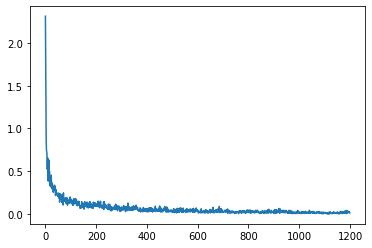

In [90]:
# Plot learning curve.
plt.plot(losses)

In [91]:
# Determine the accuracy of our clasifier
# =======================================

# Load all 10000 images from the validation set.
n = 10000
loader = torch.utils.data.DataLoader(mnist_val, batch_size=n)
images, labels = iter(loader).next()

# The tensor images has the shape [10000, 1, 28, 28]. Reshape the tensor to
# [10000, 784] as our model expected a flat vector.
data = images.view(n, -1)

# Use our model to compute the class scores for all images. The result is a
# tensor with shape [10000, 10]. Row i stores the scores for image images[i].
# Column j stores the score for class j.
predictions = model(data)

# For each row determine the column index with the maximum score. This is the
# predicted class.
predicted_classes = torch.argmax(predictions, dim=1)

# Accuracy = number of correctly classified images divided by the total number
# of classified images.
sum(predicted_classes.numpy() == labels.numpy()) / n

0.9742